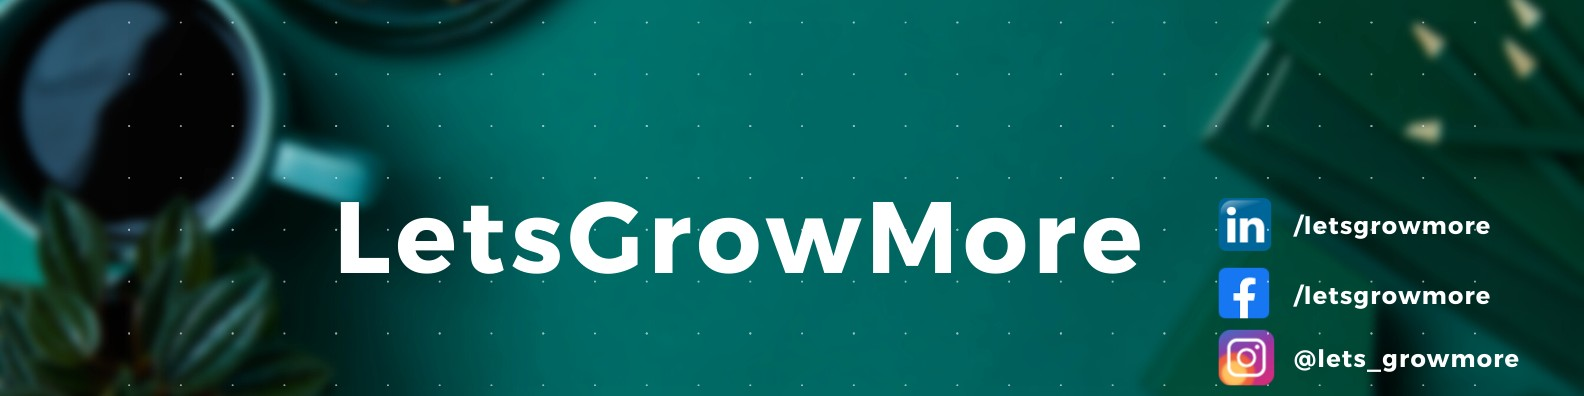

# **DATA SCIENCE INTERN AT "LetsGrowMore"**

## **Advance Level Task**

## **TASK-1: Develop A Neural Network That Can Read Handwriting**

***`Author: Akash Srivastava`***

***`Let's start by importing all the libraries we'll need for this`***

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

***`READING THE DATASET`***

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
numbers = 10
img_size = 28

y = train.pop('label')
y = keras.utils.to_categorical(y, numbers)
x = train.values
x = x.reshape((-1, img_size, img_size, 1))
test = test.values
test = test.reshape((-1, img_size, img_size, 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [10]:
import matplotlib.pyplot as plt

def plotimage(i):
    plt.imshow(x_train[i],cmap ='binary')
    plt.title(y_train[i])
    plt.show

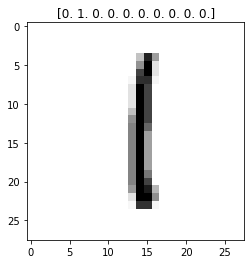

In [18]:
plotimage(0)


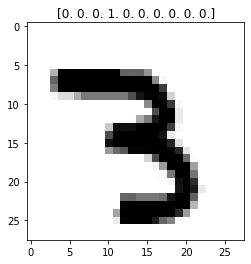

In [17]:
plotimage(1)

# ***Define the model***




In [6]:
batch_size = 128
epochs = 96

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(numbers, activation = 'softmax'))

# ***`Compiling & training the model`***

In [7]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/96
230/230 [==============================] - 28s 120ms/step - loss: 0.8397 - accuracy: 0.9023 - val_loss: 0.0869 - val_accuracy: 0.9744
Epoch 2/96
230/230 [==============================] - 31s 136ms/step - loss: 0.0711 - accuracy: 0.9783 - val_loss: 0.0796 - val_accuracy: 0.9772
Epoch 3/96
230/230 [==============================] - 31s 134ms/step - loss: 0.0391 - accuracy: 0.9871 - val_loss: 0.0664 - val_accuracy: 0.9822
Epoch 4/96
230/230 [==============================] - 32s 137ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0634 - val_accuracy: 0.9826
Epoch 5/96
230/230 [==============================] - 31s 137ms/step - loss: 0.0188 - accuracy: 0.9937 - val_loss: 0.0807 - val_accuracy: 0.9805
Epoch 6/96
230/230 [==============================] - 31s 134ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.0749 - val_accuracy: 0.9816
Epoch 7/96
230/230 [==============================] - 31s 135ms/step - loss: 0.0177 - accuracy: 0.9937 - val_loss: 0.0649 - val_ac

# ***Evaluating the model***


In [8]:
model.evaluate(x_test, y_test, verbose=2)

394/394 - 3s - loss: 0.2369 - accuracy: 0.9870


[0.23692522943019867, 0.986984133720398]

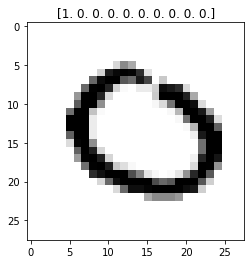

In [19]:
plotimage(2)

In [9]:
# Predict using the testing data
y_predict_data = model.predict(x_test)

# Get the value with the highest probabilty
y_prediction = np.argmax(y_predict_data, axis = 1)

# Check the prediction
y_actual = np.argmax(y_test, axis = 1)

accuracy = np.mean(y_prediction == y_actual)
print(f"Accuracy: {round(accuracy*100, 2)}%")

Accuracy: 98.7%
